Model Evaluation Metrics:
Mean Absolute Error (MAE): ₹970,043.40
Mean Squared Error (MSE): ₹1,754,318,687,330.66
R² Score: 0.653


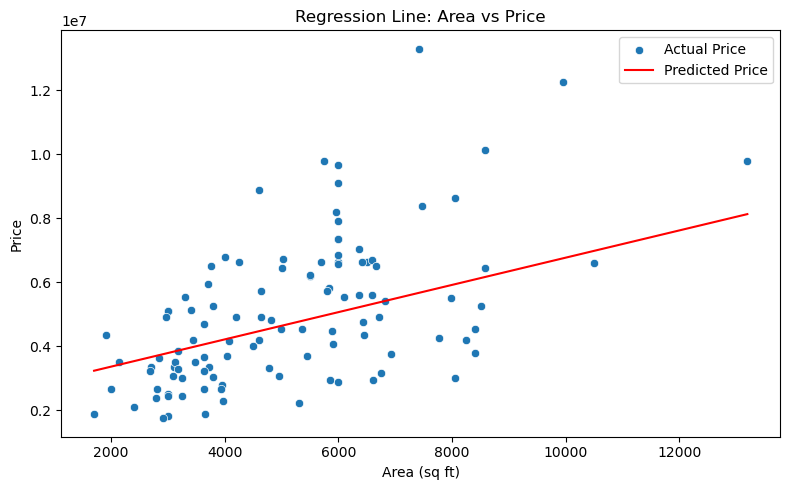


Feature Coefficients (Impact on Price):
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\sindh\OneDrive\Desktop\Internship\Housing.csv")
  


df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): ₹{mse:,.2f}")
print(f"R² Score: {r2:.3f}")


simple_model = LinearRegression()
simple_model.fit(X_train[['area']], y_train)
area_pred = simple_model.predict(X_test[['area']])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['area'], y=y_test, label='Actual Price')
sns.lineplot(x=X_test['area'], y=area_pred, color='red', label='Predicted Price')
plt.title('Regression Line: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (Impact on Price):")
print(coefficients)
